# UFC Fight Card Predictor

#### Move over boxing, there's a new girl in town. 

## About this Project:

UFC may be the new king of the fight game, and I'm here for it. With megastars like Conor McGregor, Jorge Masvidal, Brock Lesnar, and Ronda Rousey commanding over a million PPVs each, the combat sport is cementing its place amongest the heavyweights. In the past few years the sport has undergone a transformation similar its president Dana White, going from dweeby dodgeball reject to glossy action flick star. 

I can't even remember what I used to do on saturday nights, but now I crowd around the TV with my friends as we each loudly predict which fighter will win. Just when you thought UFC was for the muscle-bound monster truck bunch, you find out it is really for the nerds. 

What's more nerdy that breaking down the stats and even betting money your calculations are correct. 

In this project I will be creating a fight predictor so that like the UFC, I can also be king of Saturday nights. 



### Project Goal: 

The goal of this project is to be able to read in an upcoming fight card and predict the outcome of each fight. 

### Project Description: 

For this particular project we will be looking at UFC 272 PPV - Colby Covington vs. Jorge Masvidal.

Colby Covington and Jorge Masvidal have a legendary fued, with the classic story of turning best friends to sworn enemies in the blink of an eye. UFC 272 will an old fashioned grudge match. 

Because of this I will focus on the stats of these two fighters and how they match up against each other. 

### Initial Questions: 

1) Is there a relationship between fighter1 having a higher striking defense average than fighter2 and winning. 

2) Is there a relationship between fighter1 having a higher takedown defense average than fighter2 and winning.

3) How does Colby Covington and Jorge Masvidal's stats compare to the vlues with the greatest relationship to winning? 

4) How does Colby Covington and Jorge Masvidal's stats compare to each other? 

## Let's Get Started... 

### Data Dictionary

A list of the variables in the dataframe and their meaning. 

| Variable       | Description                         |
| -------------- | ----------------------------------- |
|event_name	                | Name of the UFC event|
|fighter1 |name of the first fighter |
|fighter2 |name of the second fighter |
|outcome|fighter1, fighter2, draw, no_contest|
|win|1 = win|
|loss|1 = loss|
|draw|1 = draw|
|no_contest|1 = no contest|
|weight_f1|fighter1's weight|
|reach_f1|fighter1's reach|
|stance_f1|fighter1's stance|
|strikes_f1|fighter1's strikes|
|strike_acc_f1|fighter1's strike accuracy average|
|strikes_absorbed_f1|fighter1's strikes absorbed average|
|strike_defense_f1|fighter1's strike defense average|
|takedowns_f1|fighter1's takedown average|
|takedown_acc_f1|fighter1's takedown accuracy average|
|takedown_def_f1|fighter1's takedown defense average|
|sub_attempt_f1|fighter1's submission attempts average|
|age_days_f1|fighter1's age in days|
|age_f1|fighter1's age|
|outcome_f1|fighter1's win/loss outcome|
|height_in_f1|fighter1's height in inches|
|stance_Orthodox_f1|1 = Orthodox|
|stance_Southpaw_f1|1 = Southpaw|
|stance_Switch_f1|1 = Switch|
|weight_f2|fighter2's weight|
|reach_f2|fighter2's reach|
|stance_f2|fighter2's stance|
|strikes_f2|fighter2's strikes|
|strike_acc_f2|fighter2's strike accuracy average|
|strikes_absorbed_f2|fighter2's strikes absorbed average|
|strike_defense_f2|fighter2's strike defense average|
|takedowns_f2|fighter2's takedown average|
|takedown_acc_f2|fighter2's takedown accuracy average|
|takedown_def_f2|fighter2's takedown defense average|
|sub_attempt_f2|fighter2's submission attempts average|
|age_days_f2|fighter2's age in days|
|age_f2|fighter2's age|
|outcome_f2|fighter2's win/loss outcome|
|height_in_f1|fighter1's height in inches|
|stance_Orthodox_f2|1 = Orthodox|
|stance_Southpaw_f2|1 = Southpaw|
|stance_Switch_f2|1 = Switch|

### Imports

These are the following imports needed to run this notebook:

In [55]:
# imports
import numpy as np
import pandas as pd

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

# stats
import scipy.stats as stats

# Classification Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# My files
from Wrangle_UFC import *
from Viz_UFC import*

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Remove Limits On Viewing Dataframes
pd.set_option('display.max_columns', None)

### Acquire and Prepare

The first thing we have to do is acquire the data. The original dataset I started with is called ufc-master.csv that I found here:

https://www.kaggle.com/bloodprashure/ufc-p4p-1-dataset/tasks?taskId=4669

Before reading this csv I cleaned the column names to make them easier to work with in python.

I wanted to create a df where the fighter1 and fighter2 stats are on the same row. To do this I created a column that concats the fighter1 and fighter2 columns together. I also did the reverse of that where the names are listed fighter2/fighter1. I wrote a for loop that prints an array of fighter1's stats and finds and prints the corresponding fighter2's stats. Then I joined them together and stored the data in a dataframe. Because of this the df does contain each match twice but it shouldn't affect my exploration or model much at all. 

To Clean the Data I: 

- Combined w, l, d, nc into on target column called outcome.
- Rename the labels in outcome to be human readable.
- rename fullname and fighter_two_name to fighter and opponent respectively. 
- Cleaned the height column by: 
    - replacing the -- with 0' 0" so my function below will work
    - converting ft to in
    - converting float to int
- Handled the Null values by: 
    - filling fight_state null values with the mode which is Navada
    - dropping null rows in columns weight, reach, stance, age, and fight_country
- Creating dummy columns for stance column and concat to df.
- Dropping the height column.


The last thing I did to prepare my data, is create a column that contains the difference between fighter1's stats and fighter2's. These are the columns I will be choosing between for modeling. The model will associate a positive difference with fighter1 winning, and a negative difference with fighter2 winning, except for with age where a negative difference is associated with fighter2 winning. 

In [2]:
# acquire data using function from Wrangle_UFC.py
final_df, fighter_stat_diff = ufc_stats_difference()

In [3]:
final_df.head(1)

,Unnamed: 0,event_name,fighter1,fighter2,outcome,win,loss,draw,no_contest,weight_f1,reach_f1,stance_f1,strikes_f1,strike_acc_f1,strikes_absorbed_f1,strike_defense_f1,takedowns_f1,takedown_acc_f1,takedown_def_f1,sub_attempt_f1,age_days_f1,age_f1,outcome_f1,height_in_f1,stance_Orthodox_f1,stance_Southpaw_f1,stance_Switch_f1,weight_f2,reach_f2,stance_f2,strikes_f2,strike_acc_f2,strikes_absorbed_f2,strike_defense_f2,takedowns_f2,takedown_acc_f2,takedown_def_f2,sub_attempt_f2,age_days_f2,age_f2,outcome_f2,height_in_f2,stance_Orthodox_f2,stance_Southpaw_f2,stance_Switch_f2,weight_diff,reach_diff,strike_diff,strike_acc_diff,strikes_absorbed_diff,strikes_defense_diff,takedown_attempts_diff,takedown_acc_diff,takedown_defense_diff,submission_attempt_diff,age_diff,height_diff
0,0,UFC 259: Blachowicz vs. Adesanya,Aalon Cruz,Uros Medic,fighter2,0,1,0,0,145.0,78.0,Switch,7.58,39,8.88,58,0.0,0,0,0.0,11490,31.0,fighter2,72,0,0,1,155.0,71.0,Southpaw,19.91,77,0.52,86,0.0,0,100,0.0,10177,27.0,fighter1,73,0,1,0,-10.0,7.0,-12.33,-38.0,8.36,-28.0,0.0,0.0,-100.0,0.0,1313.0,-1.0


### Explore

#### Split Data

Before the data is explored I will split it into three parts: train, validate, test. I do this so that I can train my model without overfitting it to that specific data, and I can verify that my model works on the validate data. Finally the test data is what I will test my final best model on to create my predictions and establish the accuracy of my model. The end target will be outcome: target1, target1, draw, or no_contest. 

In [4]:
# use function from Wrnagle_UFC to split data
train, validate, test = train_validate_test_split(final_df)

In [5]:
train.head(1)

,Unnamed: 0,event_name,fighter1,fighter2,outcome,win,loss,draw,no_contest,weight_f1,reach_f1,stance_f1,strikes_f1,strike_acc_f1,strikes_absorbed_f1,strike_defense_f1,takedowns_f1,takedown_acc_f1,takedown_def_f1,sub_attempt_f1,age_days_f1,age_f1,outcome_f1,height_in_f1,stance_Orthodox_f1,stance_Southpaw_f1,stance_Switch_f1,weight_f2,reach_f2,stance_f2,strikes_f2,strike_acc_f2,strikes_absorbed_f2,strike_defense_f2,takedowns_f2,takedown_acc_f2,takedown_def_f2,sub_attempt_f2,age_days_f2,age_f2,outcome_f2,height_in_f2,stance_Orthodox_f2,stance_Southpaw_f2,stance_Switch_f2,weight_diff,reach_diff,strike_diff,strike_acc_diff,strikes_absorbed_diff,strikes_defense_diff,takedown_attempts_diff,takedown_acc_diff,takedown_defense_diff,submission_attempt_diff,age_diff,height_diff
8625,8625,UFC 112: Invincible,Terry Etim,Rafael Dos Anjos,fighter2,0,1,0,0,155.0,73.0,Orthodox,2.16,35,2.53,67,0.43,30,39,1.4,8855,24.0,fighter2,73,1,0,0,155.0,70.0,Southpaw,3.49,46,3.22,61,1.93,37,58,0.6,9297,25.0,fighter1,68,0,1,0,0.0,3.0,-1.33,-11.0,-0.69,6.0,-1.5,-7.0,-19.0,0.8,-442.0,5.0


I want to add the numeric columns to a df to explore them separately. 

In [6]:
# add numeric columns to df 
df_num = train.select_dtypes(include='int64')

In [7]:
df_num.head(1)

,Unnamed: 0,win,loss,draw,no_contest,strike_acc_f1,strike_defense_f1,takedown_acc_f1,takedown_def_f1,age_days_f1,height_in_f1,stance_Orthodox_f1,stance_Southpaw_f1,stance_Switch_f1,strike_acc_f2,strike_defense_f2,takedown_acc_f2,takedown_def_f2,age_days_f2,height_in_f2,stance_Orthodox_f2,stance_Southpaw_f2,stance_Switch_f2
8625,8625,0,1,0,0,35,67,30,39,8855,73,1,0,0,46,61,37,58,9297,68,0,1,0


#### Visualizing what makes a winner: 

At the top of the heatmap here I can see the values that are positively correlated with fighter1 winning. At the bottom I can see what is negatively correlated with fighter1 winning. 

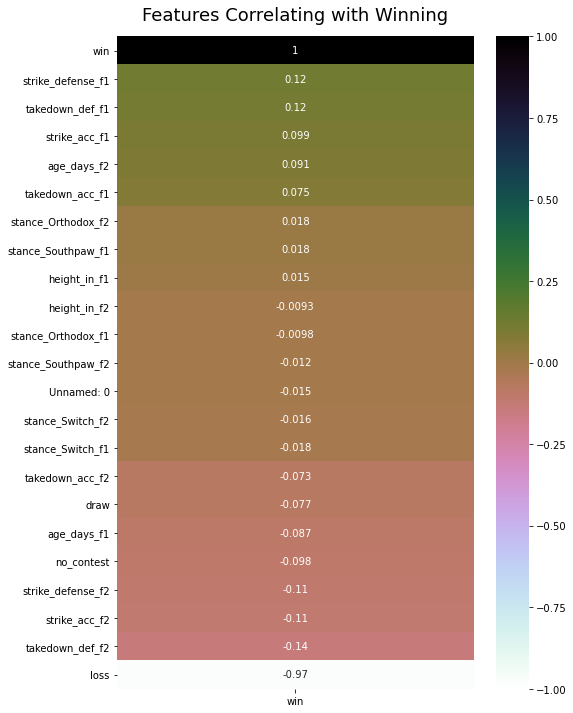

In [8]:
# heatmap of how the different values correlate to fighter1 winning using function from Viz_UFC.py
winning_corr = winning_corr_viz()

Stats Testing:


Now that I see what is correlated with winning, I want to do some stat testing to make sure my eyes don't deceive me. I'm going to test the two values with the strongest positive correlation. 

##### I will use stats testing to confirm the relationship between strikes_defense_diff and winning. 

An ANOVA test is used because I am comparing one continuous variable anoung multiple categorical values. To determine which ANOVA test to use I will check the variance to see if they are equal. 

Levene's Test: tests whether the four means that have been taken from sample populations that have equal variance

Null Hypothesis: There is no difference in strike defense variance between the four samples

Alternaive Hypothesis:  There is a difference in strike defense variance between the four samples

In [9]:
stats.levene(
    train[train.outcome == "fighter1"].strikes_defense_diff,
    train[train.outcome == "fighter2"].strikes_defense_diff,
    train[train.outcome == "draw"].strikes_defense_diff,
    train[train.outcome == "no_contest"].strikes_defense_diff,
)

LeveneResult(statistic=0.7258354436935065, pvalue=0.536440230089227)

A high P value, means we fail to reject the null hypothesis, that there is no difference in strike defense variance between the four samples.

Because we can assume equal variance we can use a f_oneway ANOVA test.

In [10]:
null_hypothesis = "Average strike defense is the same for all outcomes"
alternative_hypothesis = "Average strike defense is different for all outcomes"
alpha = 0.05 # Let's be 95% certain the result we see isn't due to chance/randomness

In [11]:
# Let's isolate out the strike defense by outcome
fighter1_strike_d = train[train.outcome == "fighter1"].strikes_defense_diff
fighter2_strike_d = train[train.outcome == "fighter2"].strikes_defense_diff
draw_strike_d = train[train.outcome == "draw"].strikes_defense_diff
no_contest_strike_d = train[train.outcome == "no_contest"].strikes_defense_diff


In [12]:
# f_oneway is our ANOVA test
# See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html for more info
from scipy.stats import f_oneway

f, p = f_oneway(fighter1_strike_d, fighter2_strike_d, draw_strike_d, no_contest_strike_d)
p

7.889634999402037e-37

In [13]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Evidence does not support the claim that average strike defense is different for all outcomes")

We reject the null hypothesis that Average strike defense is the same for all outcomes
We move forward with the alternative hypothesis that Average strike defense is different for all outcomes


The last test confirmed that there is a difference in strike defense amongest outcomes, but now I want to confirm that fighter1 has a greater strike defense average than fighter2 when fighter1 wins.

In [14]:
# testing is fighter1 winning has a greater strike defense average than when fighter2 wins
stats.mannwhitneyu(train[train.outcome == "fighter1"].strikes_defense_diff,
                   train[train.outcome == "fighter2"].strikes_defense_diff,
                   alternative ='greater')

MannwhitneyuResult(statistic=4106314.5, pvalue=7.101738632157293e-35)

Conclusion from mannwhitneyu test: fighter1 has a greater strike defense average than fighter2 when fighter1 wins

##### I will use stats testing to confirm the relationship between takedown_defense_diff and winning. 

I will do the same steps as above with takedown_defense_diff.

In [15]:
stats.levene(
    train[train.outcome == "fighter1"].takedown_defense_diff,
    train[train.outcome == "fighter2"].takedown_defense_diff,
    train[train.outcome == "draw"].takedown_defense_diff,
    train[train.outcome == "no_contest"].takedown_defense_diff,
)

LeveneResult(statistic=0.49396605158263257, pvalue=0.6864700143264336)

A high P value, means we fail to reject the null hypothesis, that there is no difference in takedown defense variance between the four samples.

In [16]:
null_hypothesis = "Average takedown defense is the same for all outcomes"
alternative_hypothesis = "Average takedown defense is the different for all outcomes"
alpha = 0.05 # Let's be 95% certain the result we see isn't due to chance/randomness

In [17]:
# Let's isolate out the takedown defense by outcome
fighter1_takedown_d = train[train.outcome == "fighter1"].takedown_defense_diff
fighter2_takedown_d = train[train.outcome == "fighter2"].takedown_defense_diff
draw_takedown_d = train[train.outcome == "draw"].takedown_defense_diff
no_contest_takedown_d = train[train.outcome == "no_contest"].takedown_defense_diff


In [18]:
# f_oneway is our ANOVA test
# See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html for more info
from scipy.stats import f_oneway

f, p = f_oneway(fighter1_takedown_d, fighter2_takedown_d, draw_takedown_d, no_contest_takedown_d)
p

1.445893608541823e-37

In [19]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Average takedown defense is the different for all outcomes.")

We reject the null hypothesis that Average takedown defense is the same for all outcomes
We move forward with the alternative hypothesis that Average takedown defense is the different for all outcomes


In [20]:
# testing is fighter1 winning has a greater takedown defense average than when fighter2 wins
stats.mannwhitneyu(train[train.outcome == "fighter1"].takedown_defense_diff,
                   train[train.outcome == "fighter2"].takedown_defense_diff,
                   alternative ='greater')

MannwhitneyuResult(statistic=4130987.0, pvalue=2.669495487258092e-37)

Conclusion from mannwhitneyu test: fighter1 has a greater takedown defense average than fighter2 when fighter1 wins

#### How does Colby Covington and Jorge Masvidal's stats compare to the values with the greatest relationship to winning?

I will be looking at Colby and Jorge's stats from the last 10 fights to see how they compare when looking at the values with the greatest relationship to winning.

In [21]:
# acquire last 10 colby fights using a function from Wrangle_UFC.py
colby_diff = get_colby()

In [22]:
# confirm acquire
colby_diff.head(1)

,event_name,fighter1,fighter2,outcome,stance_f1,stance_f2,weight_diff,reach_diff,strike_diff,strike_acc_diff,strikes_absorbed_diff,strikes_defense_diff,takedown_attempts_diff,takedown_acc_diff,takedown_defense_diff,submission_attempt_diff,age_diff,height_diff
0,UFC 268: Usman vs. Covington 2,Colby Covington,Kamaru Usman,loss,Orthodox,Switch,0,-4,-0.51,-16,0.46,-2,1.34,2,-25,0.0,-287.0,-1


In [23]:
# acquire last 10 jorge fights using a function from Wrangle_UFC.py
jorge_diff = get_jorge()

In [24]:
# confirm acquire
jorge_diff.head(1)

,event_name,fighter1,fighter2,outcome,stance_f1,stance_f2,weight_diff,reach_diff,strike_diff,strike_acc_diff,strikes_absorbed_diff,strikes_defense_diff,takedown_attempts_diff,takedown_acc_diff,takedown_defense_diff,submission_attempt_diff,age_diff,height_diff
0,UFC 261: Usman vs. Masvidal 2,Jorge Masvidal,Kamaru Usman,loss,Orthodox,Switch,0,-2,-0.41,-6,0.61,8,-1.73,11,-25,0.2,483,-1


##### Win/Loss Ratio Over Last 10 Fights:

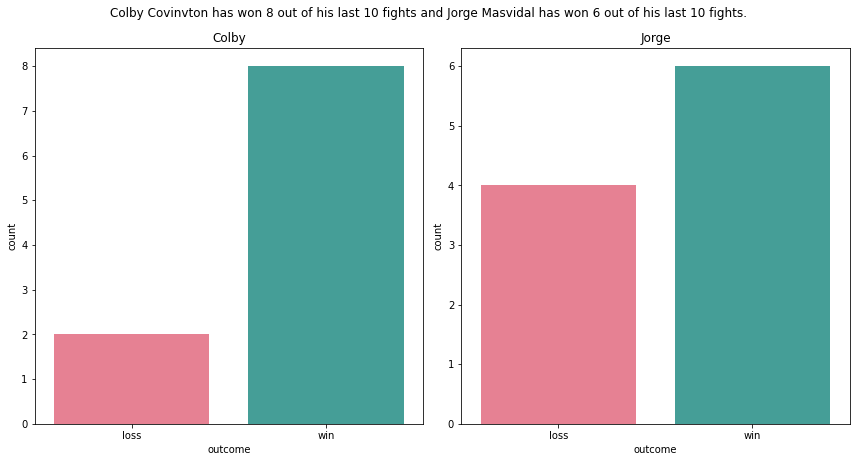

In [25]:
# win/loss comparison using function from Viz_ufc.py
win_loss = win_loss_viz()

##### Comparing Strike Defense:

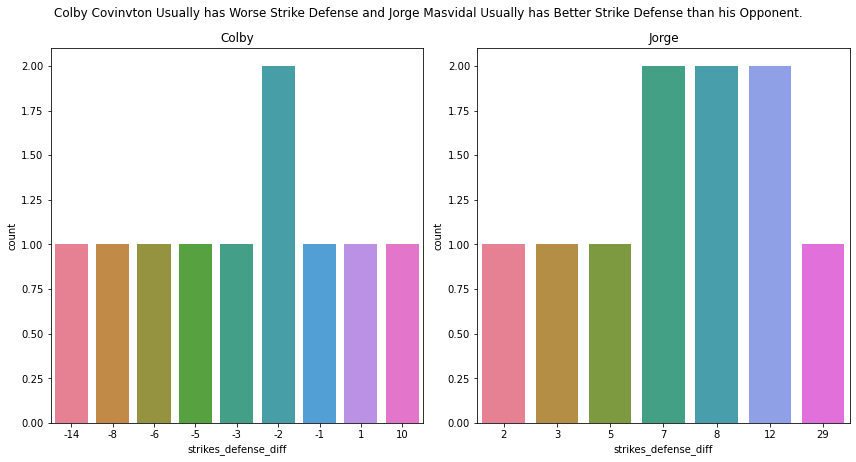

In [26]:
# strike defense comparison using function from Viz_ufc.py
stike_def = strikes_defense_viz()

##### Comparing Takedown Defense:

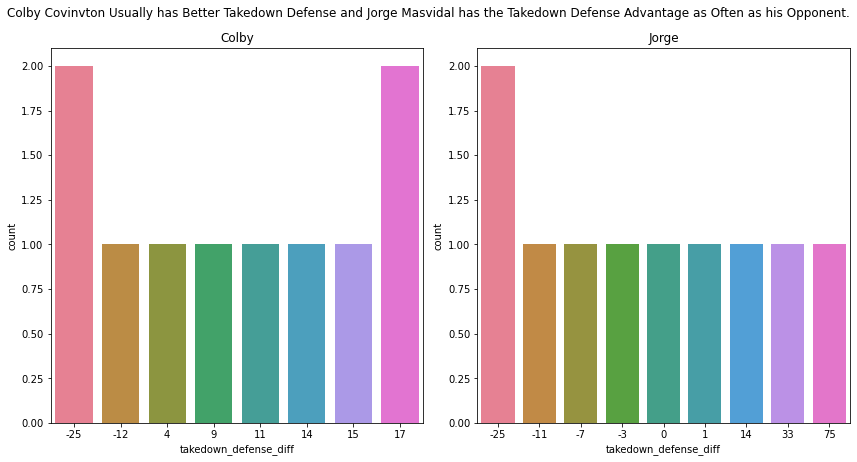

In [27]:
# takedown defense comparison using function from Viz_ufc.py
takedown_def = takedown_defense_viz()

##### Comparing Strike Accuracy:

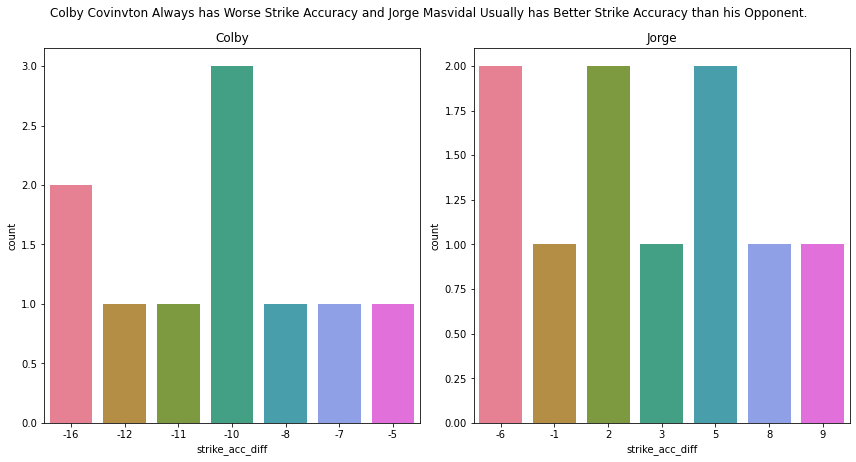

In [28]:
# strike acc comparison using function from Viz_ufc.py
strike_acc = strike_acc_viz()

##### Comparing Age Differense in Days:

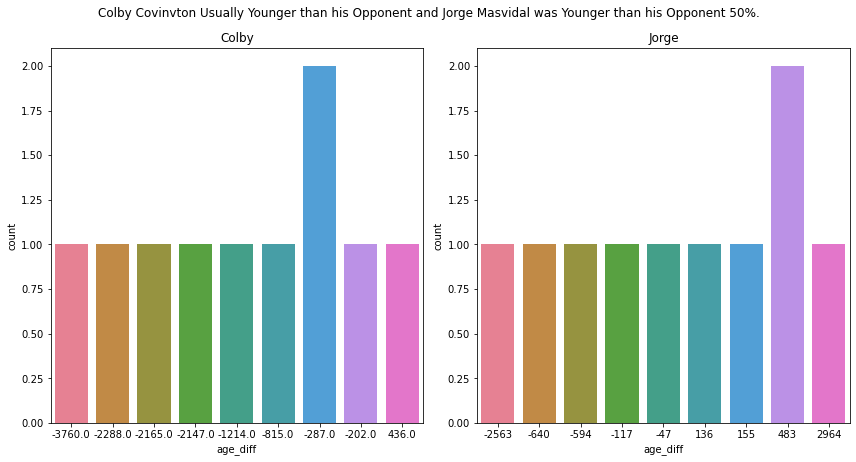

In [29]:
# age diff comparison using function from Viz_ufc.py
age_diff = age_diff_viz()

##### Comparing Takedown Accuracy:

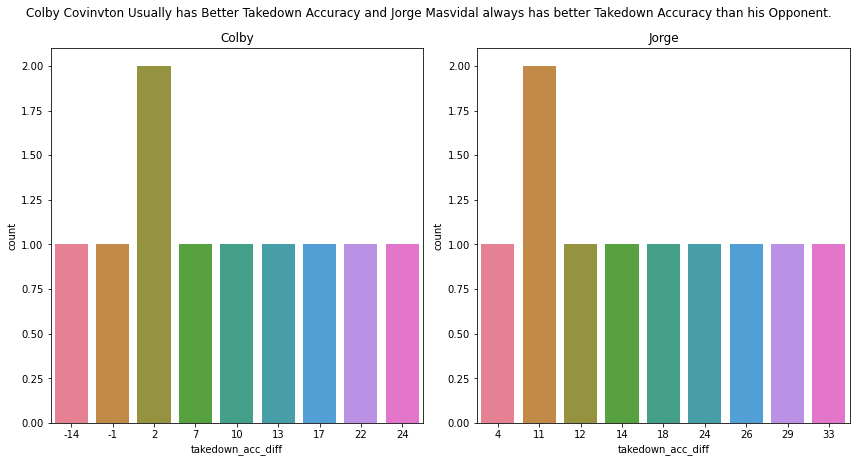

In [54]:
# takedown acc comparison using function from Viz_ufc.py
takedown_acc = takedown_acc_viz()

##### How does Colby Covington and Jorge Masvidal's stats compare to each other?

I will create a df that only has colby as fighter1 vs jorge as fighter2 with the age they will be on fight day. 

In [31]:
# acquiring df using a function in Wrangle_UFC.py
colby_vs_jorge_diff = get_colby_vs_jorge()

I want a df with only the features I will be using for modeling so that I can compare them off those values alone. 

In [32]:
# Create df with desired difference columns
colby_vs_jorge_features = colby_vs_jorge_diff[['strike_acc_diff', 'strikes_defense_diff', 'takedown_acc_diff', 'takedown_defense_diff', 'age_diff']].copy(0)
    

In [33]:
colby_vs_jorge_features

,strike_acc_diff,strikes_defense_diff,takedown_acc_diff,takedown_defense_diff,age_diff
0,-10,-10,-9,0,-1197


From looking at this comparison we can expect that Jorge Masvidal would have a better chance of winning than colby, since Colby's only advantage here is his age. 

#### Exploration Summary: 

The takeaway here is that defense and accuracy seem to have a greater impact on winning than attempts to. Being younger is also a leg up, but suprisingly to me, reach and height don't seem to make a big impact on the outcome.

When comparing Colby and Masvidal, Masvidal has the advantage in all significant areas except age and takedown defense. 

#### Features to move forward with : 

We will move forward with the top 5 values that have a strong relationship with fighter1 taking the win:

- strikes_defense_diff
- takedown_defense_diff
- strike_acc_diff 
- age_diff
- takedown_acc_diff

### Modeling 

I used three different classification models from sklearn than can handle multi-label classification since my target value is outcome: fighter1, fighter2, draw, no_contest. To see all of the models I created go to Model_UFC in my Github repository. 

#### Scale the Data

Split the fighter_stat_diff df to model on. This DF only has the columns with the fighter's stats difference but is the same as the exploration data. 

In [34]:
# use function from Wrangle_UFC to split into trin, validate, test
train, validate, test = train_validate_test_split(fighter_stat_diff)

In [35]:
# use function from Wrangle_UFC to split data into X and y variables
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = split_tvt_into_variables(train, validate, test, target='outcome')

In [36]:
X_train.head(1)

,weight_diff,reach_diff,strike_diff,strike_acc_diff,strikes_absorbed_diff,strikes_defense_diff,takedown_attempts_diff,takedown_acc_diff,takedown_defense_diff,submission_attempt_diff,age_diff,height_diff
8625,0.0,3.0,-1.33,-11.0,-0.69,6.0,-1.5,-7.0,-19.0,0.8,-442.0,5.0


I will scale the data so that age in days isn't arbitrarily given more weight by the model. 

In [37]:
# use function from Wrangle_UFC to scale the data
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Min_Max_Scaler(X_train, X_validate, X_test)

In [38]:
X_train_scaled.head(1)

,weight_diff,reach_diff,strike_diff,strike_acc_diff,strikes_absorbed_diff,strikes_defense_diff,takedown_attempts_diff,takedown_acc_diff,takedown_defense_diff,submission_attempt_diff,age_diff,height_diff
8625,0.516129,0.615385,0.464444,0.363636,0.481659,0.566667,0.430939,0.465,0.405,0.554795,0.464216,0.692308


##### Create a Baseline

I will establish a baseline to compare my models to. I will use the most common value to create the baseline predictions.

In [39]:
# baseline prediction = most common value
baseline = y_train.mode()
baseline

0    fighter1
1    fighter2
dtype: object

Fighter1 and Fighter2 win/lose an equal amount of times so I chose Fighter1 arbitrarily. 

In [40]:
match_bsl_prediction = y_train == 'fighter1'

In [41]:
baseline_accuracy = match_bsl_prediction.mean()

In [42]:
baseline_accuracy

0.492114156965828

My basline accuracy is 49%.

#### Random Forest Model

The random forest model with 10 minimum samples per leaf and a max depth of 6 was my best model with 64% accuracy on validate data. 

In [43]:
# create model
rf1_clf = RandomForestClassifier(max_depth=6, min_samples_leaf=10, random_state=123)  

In [44]:
# fit model 
rf1_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=10, random_state=123)

In [45]:
# show feature importance
print(rf1_clf.feature_importances_)

[0.02026831 0.02326123 0.20800547 0.07423172 0.1797331  0.09480763
 0.07494676 0.04768312 0.11470719 0.04278209 0.10113275 0.01844061]


In [46]:
# predict target
y_pred = rf1_clf.predict(X_train)
y_pred

array(['fighter2', 'fighter2', 'fighter1', ..., 'fighter1', 'fighter1',
       'fighter1'], dtype=object)

In [47]:
y_pred_proba = rf1_clf.predict_proba(X_train)

In [48]:
# print the accuracy
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf1_clf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.69


In [49]:
# create a classification report
class_report = classification_report(y_train, y_pred, output_dict=(True))
print("Tree1 depth")
pd.DataFrame(class_report)

Tree1 depth


,draw,fighter1,fighter2,no_contest,accuracy,macro avg,weighted avg
precision,0.0,0.680859,0.693561,0.0,0.687007,0.343605,0.676371
recall,0.0,0.713850,0.682182,0.0,0.687007,0.349008,0.687007
f1-score,0.0,0.696964,0.687825,0.0,0.687007,0.346197,0.681474
support,32.0,2621.000000,2621.000000,52.0,0.687007,5326.000000,5326.000000


##### Best model on test dataset:

In [50]:
# predict target
y_pred = rf1_clf.predict(X_test)
y_pred

array(['fighter1', 'fighter1', 'fighter2', ..., 'fighter1', 'fighter2',
       'fighter2'], dtype=object)

In [51]:
y_pred_proba = rf1_clf.predict_proba(X_test)

In [52]:
# print accuracy
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf1_clf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.64


In [53]:
# create classification report
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,draw,fighter1,fighter2,no_contest,accuracy,macro avg,weighted avg
precision,0.0,0.628743,0.645949,0.0,0.636889,0.318673,0.627294
recall,0.0,0.672359,0.621795,0.0,0.636889,0.323538,0.636889
f1-score,0.0,0.649819,0.633642,0.0,0.636889,0.320865,0.631618
support,11.0,937.000000,936.000000,19.0,0.636889,1903.000000,1903.000000


##### Best Random Forest is 64% accurate on test dataset. 

An increase from 49 to 64 represents a positive change of 30.61%

## Conclusion:

In this project I found that the greatest predictors of winning are a high strike defense, takedown defense, strike accuracy, and takedown accuracy average as well as being younger than your opponent. 

After comparing these stats for Covington and Masvidal I came to the conclusion that with the advantage in the first three categories and a tie in the forth, Masvidal has a better chance of winning than Covington. The only advantage Covington has according to these metrics is that he is younger by a few years. 

I created a model using the features strikes_defense_diff, takedown_defense_diff, strike_acc_diff, age_diff, and takedown_acc_diff.

My model is 64 percent accurate on unseen data. With an increase from 49 to 64, I improved my model from the baseline by 30.61%

## With More Time,...

- Put more steps into functions to simplify notebook
- Predict on fight card and add predictions to CSV.
- Scrape for most recent data. 
- Add win/loss record as a feature.
- Figure out how to add stance as a feature. 
- Once accuracy is increaed by a satisfactory amount, create a front end app that takes in two fighter and returns the predicted outcome. 
